In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [113]:
tot_l = pd.read_csv('./magazine/final/video_lisa_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [114]:
tot_l['ADFN_2'] = tot_l['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [115]:
tot_l['ADFN_2']

0      [Yorumlada, turk, cok, g, ö, rdum, ve, selamla...
1      [사랑, 합니다, 햇살, 굉장하다, 사랑, 해, 내, 사는, 이유, 존재, 대해, ...
2      [아름다워, 얜, 주병, 항상, 좋은, 음악, 줘서, 고마워요, 사랑, 힘내세요, ...
3      [리사, isnt, just, a, star, She, is, the, bright...
4      [바비, 같습니다, 리사, ♡, 사랑, 항상, 불공평하다, 항상, 회원, 리사, 제...
                             ...                        
192    [밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오...
193    [리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN...
194    [서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ...
195    [내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ...
196    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, BLACKPINK,...
Name: ADFN_2, Length: 197, dtype: object

### top50 리스트 생성

In [116]:
top500 = pd.read_csv('./tot_lisa_top500.csv', sep='|', encoding = 'utf-8')

In [117]:
top500

,word,count
0,리사,3570
1,예쁘다,676
2,귀엽다,543
3,춤,478
4,사랑,319
...,...,...
495,허리,16
496,칭찬,16
497,능력,16
498,국적,16


In [118]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['리사', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '얼굴', '무대', '아이돌', '매력', '태국', '한국어', '중국', '한국인', '패션', '표정', '비율', '멋있다', '실력', '느낌', '외국인', '팬', '여자', '블랙', '머리', '눈', '최고']


In [119]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['리사', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '얼굴', '무대', '아이돌', '매력', '태국', '한국어', '중국', '한국인', '패션', '표정', '비율', '멋있다', '실력', '느낌', '외국인', '팬', '여자', '블랙', '머리', '눈', '최고', '연습생', '호랑이', '컬러', '예능', '인기', '스타일', '룩', '가장', '프로', '다리', '앞머리', '좋은', '단발', '걸그룹', '태국인', '컬렉션', '외국', 'CELINE', '인형', '그룹']


### top100

In [120]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['리사', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '얼굴', '무대', '아이돌', '매력', '태국', '한국어', '중국', '한국인', '패션', '표정', '비율', '멋있다', '실력', '느낌', '외국인', '팬', '여자', '블랙', '머리', '눈', '최고', '연습생', '호랑이', '컬러', '예능', '인기', '스타일', '룩', '가장', '프로', '다리', '앞머리', '좋은', '단발', '걸그룹', '태국인', '컬렉션', '외국', 'CELINE', '인형', '그룹', '브랜드', 'YG', '모델', '좋다', '대박', '노력', '카리스마', '짱', '쌤', '한국말', '처음', '간지', '선생님', '스타', '참석', '우리나라', '세계', '컴백', '봄', '해외', '프라다', '좋아요', '포인트', '매치', '미쳤다', '연습', '옷', '성격', '목소리', '콘서트', '춤선', '화보', '분위기', '재킷', '음악', '메인', '개멋', '일본', '멋있어', '나라', '태국어', '댄스', '언어', '방송', '화장', '완성', '중국어', '사기', '티셔츠', '세상']


In [121]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['리사', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '얼굴', '무대', '아이돌', '매력', '태국', '한국어', '중국', '한국인', '패션', '표정', '비율', '멋있다', '실력', '느낌', '외국인', '팬', '여자', '블랙', '머리', '눈', '최고', '연습생', '호랑이', '컬러', '예능', '인기', '스타일', '룩', '가장', '프로', '다리', '앞머리', '좋은', '단발', '걸그룹', '태국인', '컬렉션', '외국', 'CELINE', '인형', '그룹', '브랜드', 'YG', '모델', '좋다', '대박', '노력', '카리스마', '짱', '쌤', '한국말', '처음', '간지', '선생님', '스타', '참석', '우리나라', '세계', '컴백', '봄', '해외', '프라다', '좋아요', '포인트', '매치', '미쳤다', '연습', '옷', '성격', '목소리', '콘서트', '춤선', '화보', '분위기', '재킷', '음악', '메인', '개멋', '일본', '멋있어', '나라', '태국어', '댄스', '언어', '방송', '화장', '완성', '중국어', '사기', '티셔츠', '세상', '확실히', '젤', '많은', '배', '아이템', '미친', '한번', '탑', '회수', '댄서', '제발', '곡', '제목', '남자', '형님', '시크', '오늘', '팬츠', '매우', '찰떡', '레전드', '라이브', '반', '가수', '프로그램', '웃기', '솔로', '촬영', '별', '나나', '좋겠다', '마음', '좋음', '유닛', '입덕', '연예인', '보임', '개국', '레드', '톱', '데님', '좋아하는', '리', '라인', '입', '고마츠', '사실', '출국', '스타일링', '수준', '카메라', 'and', '손', '말투', '연출', '스커트', 'A', '점', '마지막', '래퍼', '개인

In [122]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['리사', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '얼굴', '무대', '아이돌', '매력', '태국', '한국어', '중국', '한국인', '패션', '표정', '비율', '멋있다', '실력', '느낌', '외국인', '팬', '여자', '블랙', '머리', '눈', '최고', '연습생', '호랑이', '컬러', '예능', '인기', '스타일', '룩', '가장', '프로', '다리', '앞머리', '좋은', '단발', '걸그룹', '태국인', '컬렉션', '외국', 'CELINE', '인형', '그룹', '브랜드', 'YG', '모델', '좋다', '대박', '노력', '카리스마', '짱', '쌤', '한국말', '처음', '간지', '선생님', '스타', '참석', '우리나라', '세계', '컴백', '봄', '해외', '프라다', '좋아요', '포인트', '매치', '미쳤다', '연습', '옷', '성격', '목소리', '콘서트', '춤선', '화보', '분위기', '재킷', '음악', '메인', '개멋', '일본', '멋있어', '나라', '태국어', '댄스', '언어', '방송', '화장', '완성', '중국어', '사기', '티셔츠', '세상', '확실히', '젤', '많은', '배', '아이템', '미친', '한번', '탑', '회수', '댄서', '제발', '곡', '제목', '남자', '형님', '시크', '오늘', '팬츠', '매우', '찰떡', '레전드', '라이브', '반', '가수', '프로그램', '웃기', '솔로', '촬영', '별', '나나', '좋겠다', '마음', '좋음', '유닛', '입덕', '연예인', '보임', '개국', '레드', '톱', '데님', '좋아하는', '리', '라인', '입', '고마츠', '사실', '출국', '스타일링', '수준', '카메라', 'and', '손', '말투', '연출', '스커트', 'A', '점', '마지막', '래퍼', '개인

In [123]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['리사', '예쁘다', '귀엽다', '춤', '사랑', '랩', '한국', '영어', '노래', '얼굴', '무대', '아이돌', '매력', '태국', '한국어', '중국', '한국인', '패션', '표정', '비율', '멋있다', '실력', '느낌', '외국인', '팬', '여자', '블랙', '머리', '눈', '최고', '연습생', '호랑이', '컬러', '예능', '인기', '스타일', '룩', '가장', '프로', '다리', '앞머리', '좋은', '단발', '걸그룹', '태국인', '컬렉션', '외국', 'CELINE', '인형', '그룹', '브랜드', 'YG', '모델', '좋다', '대박', '노력', '카리스마', '짱', '쌤', '한국말', '처음', '간지', '선생님', '스타', '참석', '우리나라', '세계', '컴백', '봄', '해외', '프라다', '좋아요', '포인트', '매치', '미쳤다', '연습', '옷', '성격', '목소리', '콘서트', '춤선', '화보', '분위기', '재킷', '음악', '메인', '개멋', '일본', '멋있어', '나라', '태국어']


### top50만 남기기

In [124]:
len(tot_l)

197

In [125]:
top30_word = []
for i in range(len(tot_l)):
    w=[]
    for word in tot_l.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [126]:
top50_word = []
for i in range(len(tot_l)):
    w=[]
    for word in tot_l.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [127]:
top100_word = []
for i in range(len(tot_l)):
    w=[]
    for word in tot_l.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [128]:
top200_word = []
for i in range(len(tot_l)):
    w=[]
    for word in tot_l.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [129]:
top300_word = []
for i in range(len(tot_l)):
    w=[]
    for word in tot_l.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [130]:
top500_word = []
for i in range(len(tot_l)):
    w=[]
    for word in tot_l.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [107]:
tot_l

,magazine,brand,title,word_lisa,ADFN,ADFN_2
0,YOUTUBE,YOUTUBE,BLACKPINK - 'How You Like That' LISA Concept T...,['Yorumlada turk cok gördum ve selamlar verıyo...,"['Yorumlada', 'turk', 'cok', 'g', 'ö', 'rdum',...","[Yorumlada, turk, cok, g, ö, rdum, ve, selamla..."
1,YOUTUBE,YOUTUBE,BLACKPINK - 'KILL THIS LOVE' LISA TEASER VIDEO...,"['나는 당신을 사랑합니다, 나의 햇살.너 굉장하다.사랑해너는 내가 사는 이유야나는...","['사랑', '합니다', '햇살', '굉장하다', '사랑', '해', '내', '사...","[사랑, 합니다, 햇살, 굉장하다, 사랑, 해, 내, 사는, 이유, 존재, 대해, ..."
2,YOUTUBE,YOUTUBE,BLACKPINK - 'SQUARE UP' LISA MOVING POSTER_kor...,"['너는 너무 아름다워!', '얜 공주병', '항상 좋은 음악을 줘서 고마워요!',...","['아름다워', '얜', '주병', '항상', '좋은', '음악', '줘서', '고...","[아름다워, 얜, 주병, 항상, 좋은, 음악, 줘서, 고마워요, 사랑, 힘내세요, ..."
3,YOUTUBE,YOUTUBE,BLACKPINK - 'THE ALBUM' LISA Concept Teaser Vi...,['리사 isnt just a star. She is the brightest st...,"['리사', 'isnt', 'just', 'a', 'star', 'She', 'is...","[리사, isnt, just, a, star, She, is, the, bright..."
4,YOUTUBE,YOUTUBE,BLACKPINK - LISA 'Forever Young' FOCUSED CAMER...,"['당신은 바비와 같습니다! 리사♡', '사랑해요.', '이것은 항상 불공평하다. ...","['바비', '같습니다', '리사', '♡', '사랑', '항상', '불공평하다',...","[바비, 같습니다, 리사, ♡, 사랑, 항상, 불공평하다, 항상, 회원, 리사, 제..."
...,...,...,...,...,...,...
192,W,L,밀라노로 떠난 리사,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', 'B...","[밀란, 패션위크, 참석, 차, 출국, 리사, 공항, BLACKPINK, 리사, 오..."
193,W,L,리사의 새로운 행보,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', '할', '보인다', 'YG', '엔...","[리사, 패션, 브랜드, 탄생, 할, 보인다, YG, 엔터테인먼트, BLACKPIN..."
194,W,L,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 두, 스타, BLACKPINK, 세레나, 고메즈, 함께한, ..."
195,W,L,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, BLACKPINK, 귀여운, 포스팅, 제니, ..."


### item 남기기

In [80]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [81]:
item_word = []
for i in range(len(mag_je)):
    w=[]
    for word in mag_je.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

NameError: name 'mag_je' is not defined

### top100이면서 item이 아닌 것

In [15]:
top100_not_item_word = []
for i in range(len(tot_je)):
    w=[]
    for word in tot_je.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [16]:
len(top100_not_item_word)

297

In [172]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

In [22]:
top30_word

[['한국어',
  '리사',
  '사랑',
  '리사',
  '멋있다',
  '매력',
  '리사',
  '예쁘다',
  '리사',
  '리사',
  '사랑',
  '사랑',
  '사랑',
  '리사',
  '멋있다',
  '사랑',
  '사랑',
  '사랑',
  '사랑'],
 ['사랑',
  '사랑',
  '리사',
  '잘',
  '사랑',
  '사랑',
  '사랑',
  '리사',
  '리사',
  '예쁘다',
  '사랑',
  '리사',
  '예쁘다',
  '사랑',
  '리사',
  '리사',
  '리사'],
 ['사랑', '리사', '예쁘다', '리사', '사랑'],
 ['리사', '리사', '느낌', '사랑', '리사', '리사', '리사', '사랑', '리사', '리사', '리사', '리사'],
 ['리사',
  '사랑',
  '리사',
  '춤',
  '팬',
  '리사',
  '예쁘다',
  '춤',
  '한국어',
  '리사',
  '리사',
  '귀엽다',
  '리사',
  '리사',
  '리사',
  '사랑'],
 ['리사',
  '춤',
  '리사',
  '리사',
  '예쁘다',
  '리사',
  '사랑',
  '리사',
  '예쁘다',
  '리사',
  '리사',
  '리사',
  '사랑',
  '춤',
  '리사',
  '멋있다',
  '한국인',
  '사랑',
  '리사',
  '사랑',
  '춤'],
 ['리사',
  '리사',
  '비율',
  '사랑',
  '노래',
  '노래',
  '노래',
  '사랑',
  '리사',
  '한국',
  '춤',
  '리사',
  '리사',
  '사랑',
  '리사',
  '리사',
  '리사',
  '리사',
  '얼굴',
  '비율',
  '리사',
  '사랑'],
 ['태국',
  '멋있다',
  '리사',
  '리사',
  '태국',
  '한국',
  '여자',
  '리사',
  '한국인',
  '한국',
  '한국',
  '리사',
  '한국인',
  '예쁘다',
  '사랑

In [49]:
len(top50_word)

351

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [82]:
# 어프라이어리(Apriori)
from apyori import apriori

In [83]:
top30_word[10]

['사랑',
 '한국',
 '태국',
 '리사',
 '한국어',
 '최고',
 '리사',
 '리사',
 '매력',
 '얼굴',
 '비율',
 '실력',
 '리사',
 '예쁘다',
 '한국어',
 '한국',
 '랩',
 '태국',
 '한국어',
 '리사',
 '사랑',
 '최고',
 '매력',
 '예쁘다',
 '리사',
 '느낌',
 '태국',
 '리사',
 '리사',
 '예쁘다',
 '예쁘다',
 '예쁘다',
 '무대',
 '리사',
 '리사',
 '리사',
 '예쁘다',
 '멋있다',
 '귀엽다',
 '리사',
 '매력',
 '태국',
 '태국',
 '여자',
 '한국인',
 '리사',
 '사랑',
 '리사',
 '리사',
 '사랑',
 '리사',
 '태국',
 '태국',
 '리사',
 '한국',
 '리사',
 '사랑',
 '리사',
 '사랑',
 '리사',
 '예쁘다',
 '리사',
 '귀엽다',
 '리사',
 '랩',
 '예쁘다',
 '리사',
 '예쁘다',
 '리사',
 '리사',
 '눈',
 '리사',
 '리사',
 '춤',
 '리사',
 '예쁘다',
 '랩',
 '춤',
 '무대',
 '리사',
 '한국',
 '아이돌',
 '리사',
 '리사',
 '춤',
 '실력',
 '중국',
 '리사',
 '사랑',
 '리사',
 '리사',
 '눈',
 '리사',
 '리사',
 '랩',
 '실력',
 '리사',
 '팬',
 '리사',
 '랩',
 '실력',
 '랩',
 '실력',
 '랩',
 '여자',
 '춤',
 '노래',
 '외국인',
 '리사',
 '리사',
 '한국인',
 '눈',
 '여자',
 '예쁘다',
 '리사',
 '예쁘다',
 '리사',
 '사랑',
 '예쁘다',
 '태국',
 '태국',
 '리사',
 '한국',
 '태국',
 '리사',
 '리사',
 '리사',
 '사랑',
 '태국',
 '춤',
 '리사',
 '예쁘다',
 '리사',
 '춤',
 '귀엽다',
 '리사',
 '한국',
 '리사',
 '리사',
 '리사',
 '사랑',
 '예쁘다

In [131]:
# 지지도(support) : P(A∩B)
result = list(apriori(top200_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
215,"(패션, 리사)",0.406091,"[((), (패션, 리사), 0.40609137055837563, 1.0), ((리...",2
162,"(매력, 리사)",0.299492,"[((), (매력, 리사), 0.29949238578680204, 1.0), ((리...",2
174,"(리사, 블랙)",0.253807,"[((), (리사, 블랙), 0.25380710659898476, 1.0), ((리...",2
210,"(컬러, 리사)",0.243655,"[((), (컬러, 리사), 0.2436548223350254, 1.0), ((리사...",2
218,"(포인트, 리사)",0.233503,"[((), (포인트, 리사), 0.233502538071066, 1.0), ((리사...",2
156,"(리사, 룩)",0.233503,"[((), (리사, 룩), 0.233502538071066, 1.0), ((룩), ...",2
176,"(사랑, 리사)",0.228426,"[((), (사랑, 리사), 0.22842639593908629, 1.0), ((리...",2
180,"(리사, 스타일)",0.213198,"[((), (리사, 스타일), 0.2131979695431472, 1.0), ((리...",2
169,"(무대, 리사)",0.213198,"[((), (무대, 리사), 0.2131979695431472, 1.0), ((리사...",2
216,"(팬, 리사)",0.208122,"[((), (팬, 리사), 0.20812182741116753, 1.0), ((리사...",2


### networkx 그래프 정의

In [132]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [133]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [134]:
pos = nx.spring_layout(G)

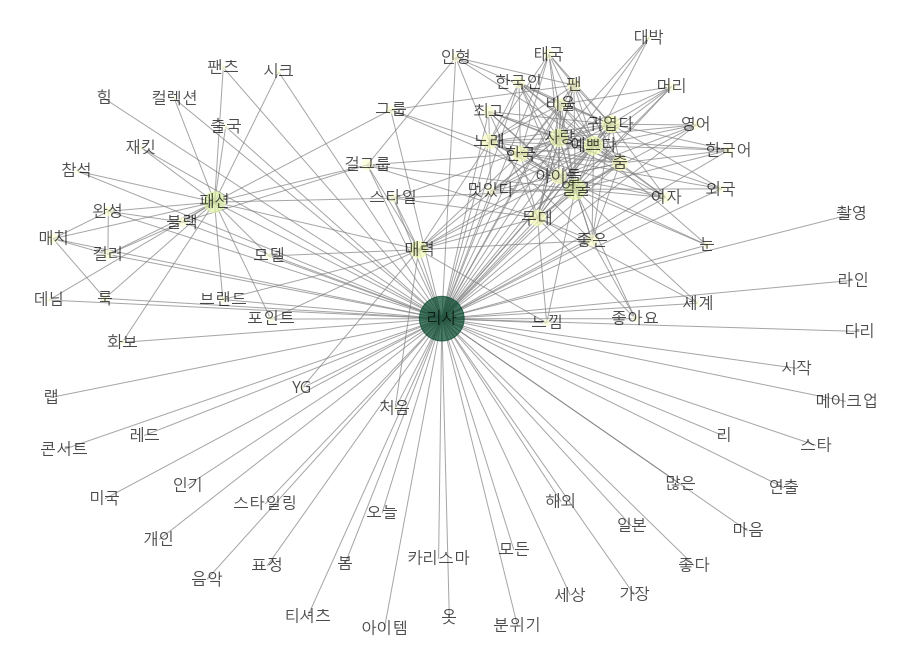

In [135]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.YlGn)

plt.savefig('./lisa_top200word.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']